In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv")

In [34]:
df["Exited"] = df["Exited"].astype(bool)
df["IsActiveMember"] = df["IsActiveMember"].astype(bool)
df["HasCrCard"] = df["HasCrCard"].astype(bool)

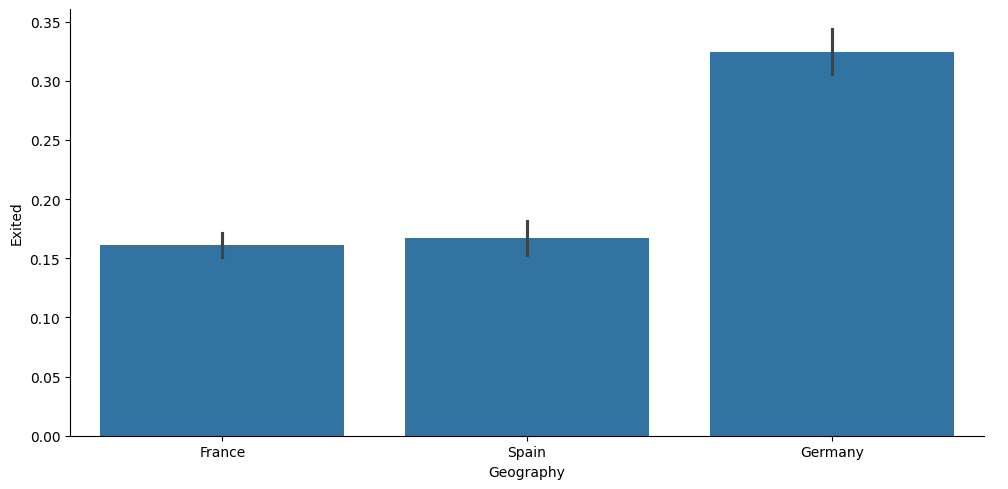

In [12]:
sns.catplot(x="Geography", y="Exited", data=df, kind="bar", height=5, aspect=2)

In [60]:
churn_geog = df.groupby('Geography')["Exited"].mean()
print(churn_geog)

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


In [61]:
num_geog = df["Geography"].value_counts()
print(num_geog)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


The churn rate by geography gives Germany a much higher churn rate than both France and Spain. Since Spain and Germany are close in number, there could be a reasonable conclusion drawn from their data. However, the difference in number between France and the two other countries is too great, with both Germany and Spain being around 50% of France. Thus, any comparisons made between France and the other countries must not be taken at face value. So, we must look at more data to draw any conclusions, but so far it seems to suggest that geography may affect the churn rate of customers.

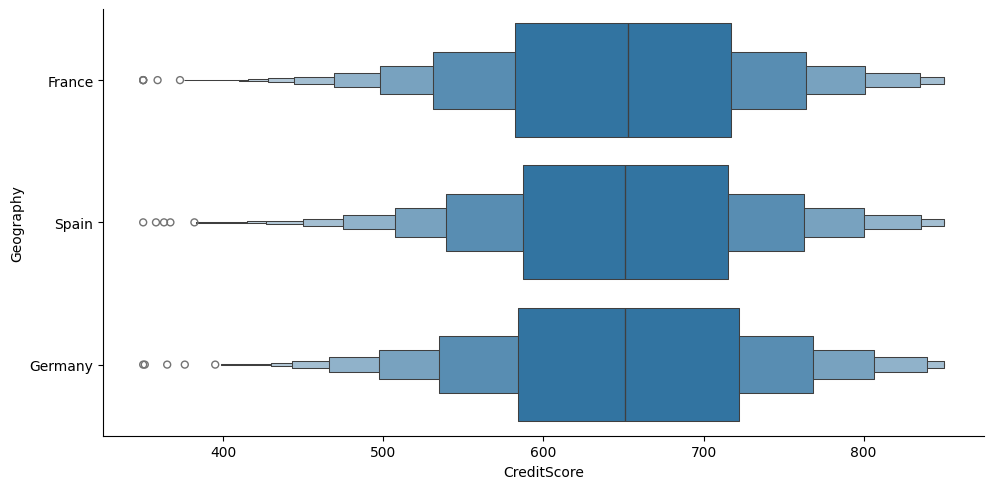

In [46]:
sns.catplot(x="CreditScore", y="Geography", data=df, kind="boxen", height=5, aspect=2)

Looks the same between the different geographical locations despite their different churn rates, so far credit score does not seem relevant

<Axes: xlabel='Exited', ylabel='CreditScore'>

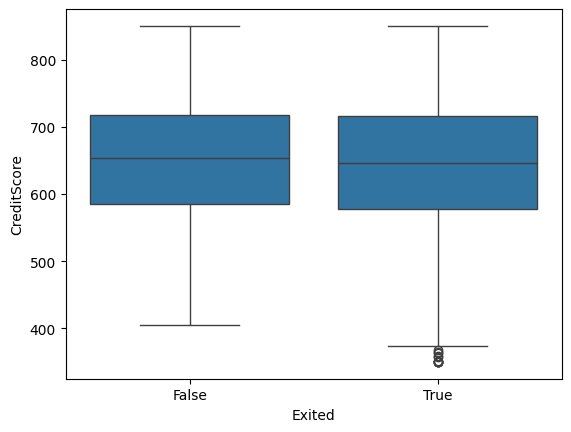

In [66]:
sns.boxplot(x="Exited", y="CreditScore", data=df)

It doesn't look like credit score plays much into a customer's decision to exit, however there are interesting outliers who did exit.

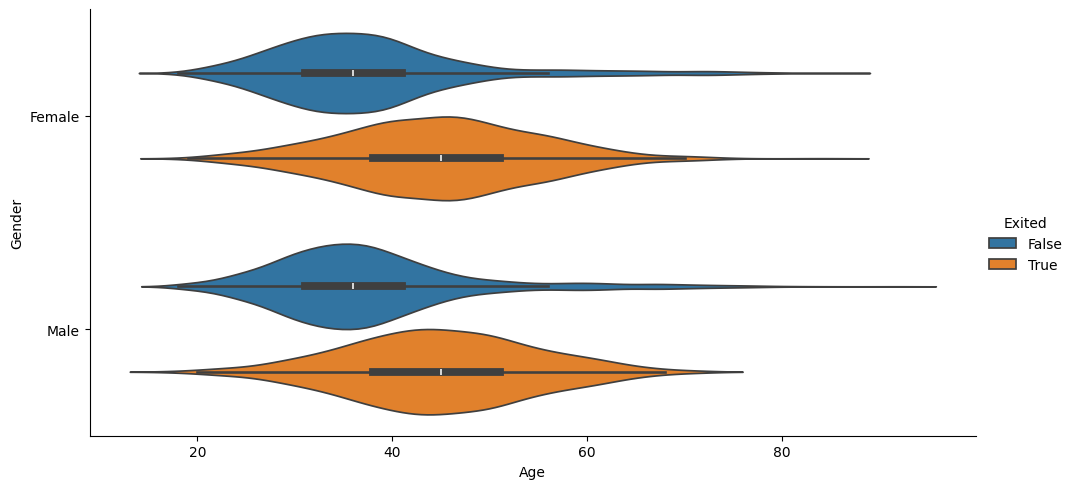

In [17]:
sns.catplot(x="Age", y="Gender", hue="Exited", data=df, kind="violin", height=5, aspect=2)

It seems that people between the ages of 35 and 55 are more likely to exit, with no noticeable difference between the men and women.

<Axes: xlabel='Exited', ylabel='Age'>

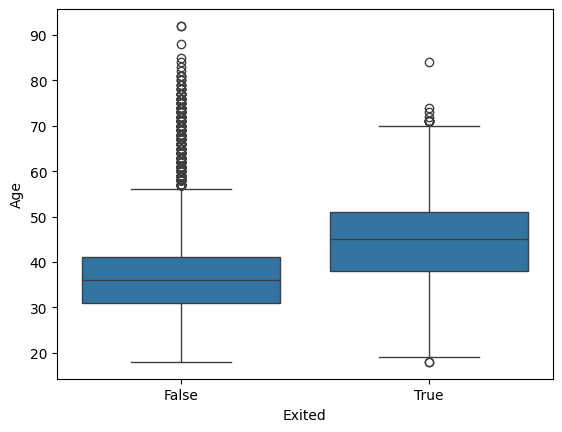

In [67]:
sns.boxplot(x="Exited", y="Age", data=df)

Looking overall and not by gender, it does seem that people aged around 40-55 are more likely to exit

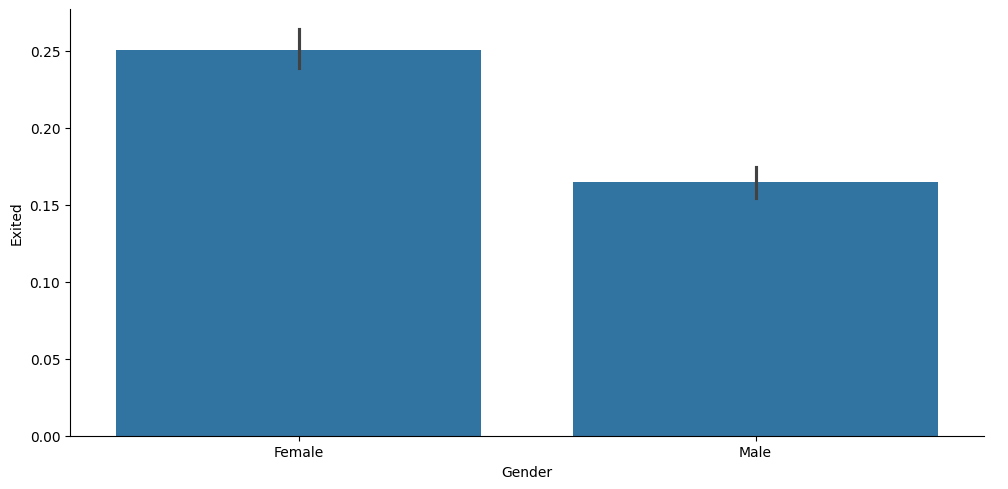

In [8]:
sns.catplot(x="Gender", y="Exited", data=df, kind="bar", height=5, aspect=2)

In [57]:
churn_gender = df.groupby('Gender')["Exited"].mean()
print(churn_gender)

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


In [59]:
num_gender = df["Gender"].value_counts()
print(num_gender)

Gender
Male      5457
Female    4543
Name: count, dtype: int64


So according to this dataset, the churn rate is 8.6% higher for women than men. However, because of the difference in the number of men and women with there being 914 (16.7% of the male count) less women, these accuracy of these percentages should not be indicative of any real gender-based churn rate. 

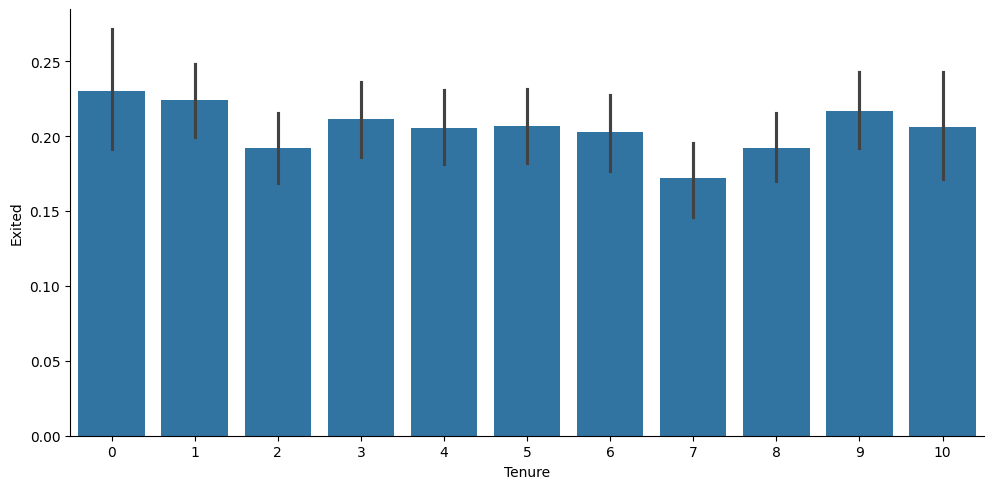

In [63]:
sns.catplot(x="Tenure", y="Exited", kind="bar", data=df, height=5, aspect=2)

Exiting seems to fluctuate when compared to tenure, where it is more likely within the first year, then it mostly stays within the range of 20% until year nine when it peaks again. There is also a noticeable drop in the seventh year.

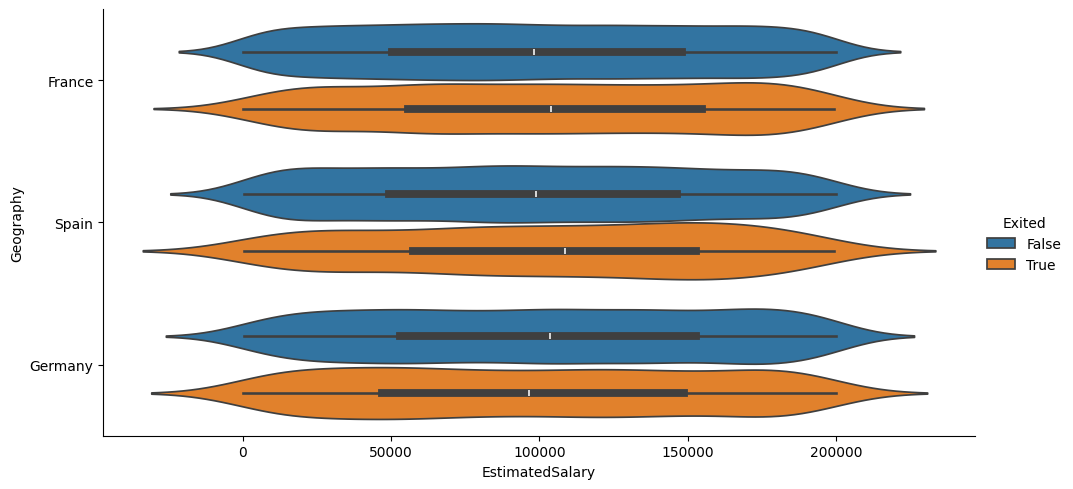

In [40]:
sns.catplot(x="EstimatedSalary", y="Geography", hue="Exited", data=df, kind="violin", height=5, aspect=2)

All of the median salaries are very close together, the density stays mostly uniform, and there is not much change geographically either. Overall the estimated salary does not appear significant

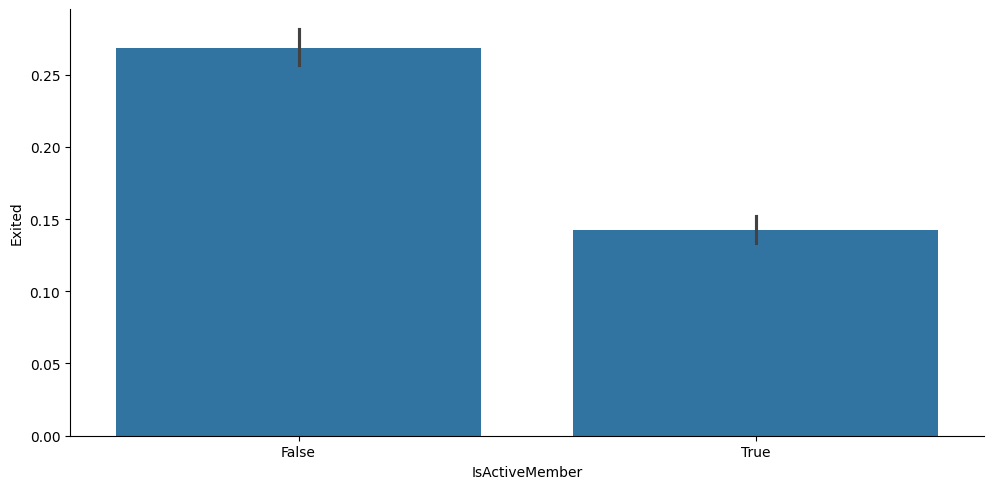

In [44]:
sns.catplot(x="IsActiveMember", y="Exited", data=df, kind="bar", height=5, aspect=2)

Over 25% of people who exited are also no longer active members, so we can draw the conclusion that people who are not active are more likely to exit the company.

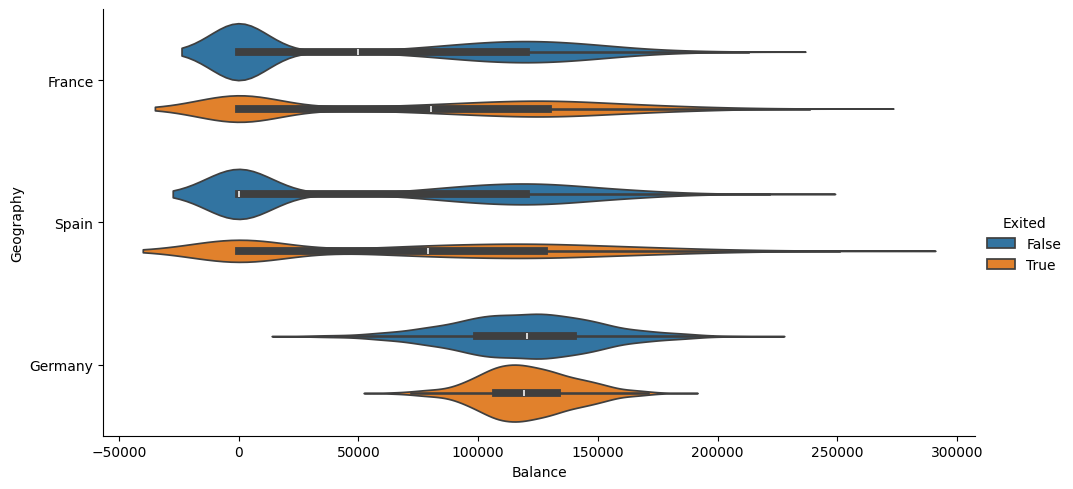

In [47]:
sns.catplot(x="Balance", y="Geography", hue="Exited",  data=df, kind="violin", height=5, aspect=2)

In France and Spain the minimum observed value and Q1 are both zero, so there is no lower whisker, however their upper whiskers reach much farther than Germany's. Meanwhile, Germany's minimum observed value is still greater than zero, which could explain the difference in median. Germany is also different in the sense that its non-exited median is higher than its exited median, if only slightly, unlike France and Spain. Judging by the density of these graphs, it looks like the majority of people who exited in France and Spain had a balance of zero, while in Germany they had a balance of around 110000. However, in France in Spain, the widest parts of the exited group's density plot is still smaller than the non-exited group's, meaning no conclusions can be drawn about balance being linked to exiting.

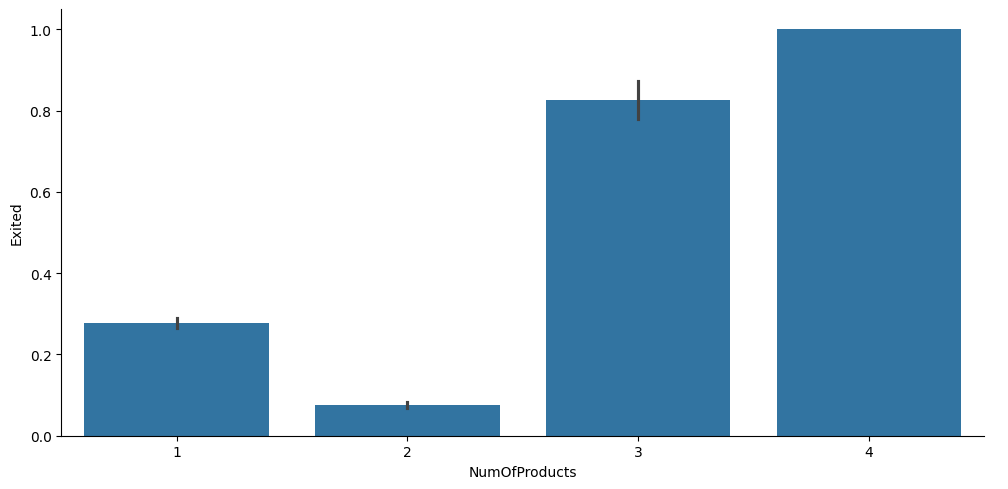

In [69]:
sns.catplot(x="NumOfProducts", y="Exited", data=df, kind="bar", height=5, aspect=2)

In [70]:
num_products = df["NumOfProducts"].value_counts()
print(num_products)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [71]:
churn_products = df.groupby("NumOfProducts")["Exited"].mean()
print(churn_products)

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64


It looks like the more products a customer has, the more likely they are to churn, with those with four products having a 100% chance. However, there are only 60 customers with four products, so that percentage is flawed.

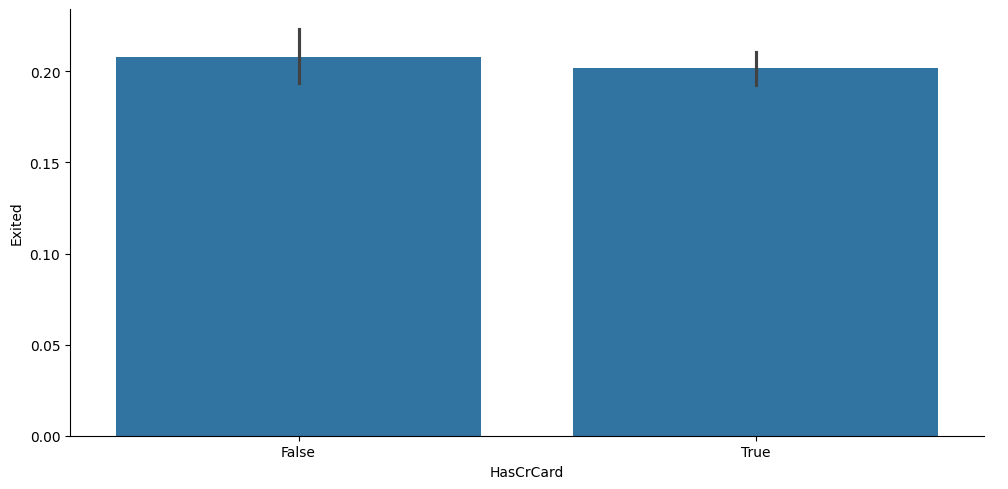

In [72]:
sns.catplot(x="HasCrCard", y="Exited", data=df, kind="bar", height=5, aspect=2)

It seems like those without a credit card have a slightly bigger chance of churning, however because they are so close it might not be the best point of reference.